#Classifying Movie Revies (Binary Classification Problem)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)


In [3]:
#Decoding reviews list to text again

word_index = imdb.get_word_index()
reverse_word_index = {value:key for key, value in word_index.items()}
decoded_review = " ".join([reverse_word_index[index] for index in train_data[0]])
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [4]:
#Vectorize the data using multi-hot encoding

def vectorize_sequences(sequences, dimension = 10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence]  = 1
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
#Vectorize the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
#Build the model using Sequential API
from tensorflow.keras import layers
model = tf.keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


history = model.fit(partial_x_train, partial_y_train, epochs = 40, batch_size = 512, validation_data = (x_val, y_val))
history

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6698 - loss: 0.6121 - val_accuracy: 0.8655 - val_loss: 0.3898
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8965 - loss: 0.3333 - val_accuracy: 0.8867 - val_loss: 0.3117
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9280 - loss: 0.2381 - val_accuracy: 0.8847 - val_loss: 0.2914
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9351 - loss: 0.1980 - val_accuracy: 0.8896 - val_loss: 0.2758
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9501 - loss: 0.1607 - val_accuracy: 0.8882 - val_loss: 0.2762
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9601 - loss: 0.1345 - val_accuracy: 0.8620 - val_loss: 0.3525
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9612 - loss: 0.1185 - val_accuracy: 0.8772 - val_loss: 0.3141
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9729 - loss: 0.0977 - val_accuracy: 0.8832 - val_loss

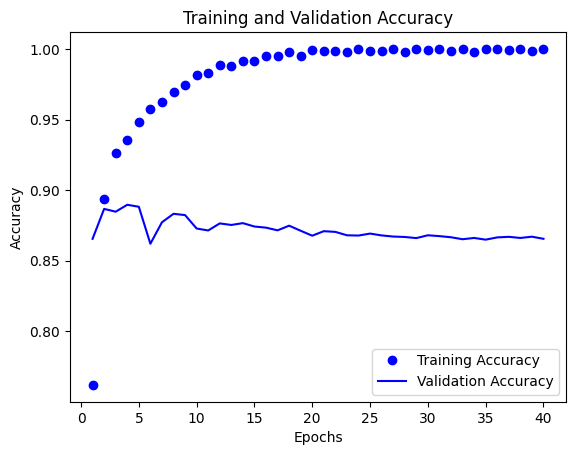

In [7]:
history_dict = history.history
accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]
epochs = range(1, len(accuracy)+1)
plt.plot(epochs, accuracy, "bo", label = "Training Accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

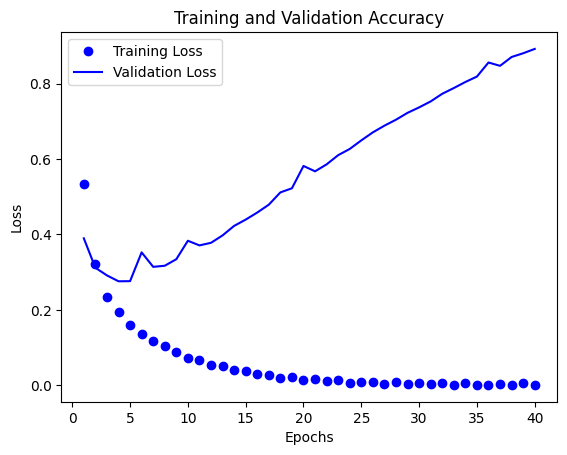

In [8]:
history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
results = model.evaluate(x_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8498 - loss: 0.9917  


[0.9678409099578857, 0.8527200222015381]

In [11]:
predictions = model.predict(x_test)
predictions.shape

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step


(25000, 1)